In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

fp = os.getcwd().replace(r"\plotly", "") + r"\data"

# Dataset 1
titanic = pd.read_csv(fp + r"\titanic_train.csv")
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
# Dataset 2
gdp = pd.read_csv(fp + r"\gdp.csv")
gdp.head(3)

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10


# Basics

Even tho, it is possible to create plots by just writing plt.plot / plt.bar, i would recommend to always use the fig, ax notation. Its one more line needed, but adds a layer of options to it and allows easier transition into subplots later.

You can acess each subplot by ax[row, column]

### Line plots

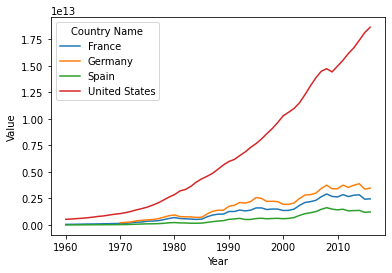

In [6]:
# Defining Data
data = gdp.loc[gdp["Country Name"].isin(["United States", "Germany", "France", "Spain", "Russia"])]

sns.lineplot(data = data, x = "Year", y = "Value", hue = "Country Name")

plt.show()

### Bar Plot

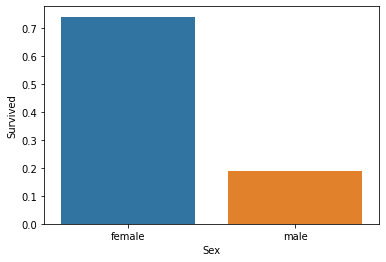

In [7]:
# Defining Data
data = titanic.pivot_table(
        values = "Survived",
        index = "Sex",
        aggfunc = "mean").reset_index()

sns.barplot(data = data, x = "Sex", y = "Survived")
plt.show()

### Scatter plot

Sadly its not that easy to get the desired coloring and legends in matplotlib.

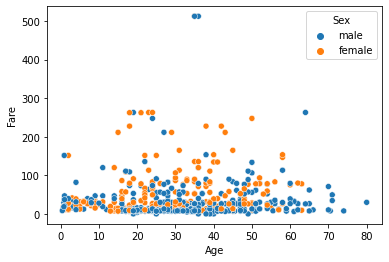

In [8]:
sns.scatterplot(data = titanic, x = "Age", y = "Fare", hue = "Sex")
plt.show()

### Pie Chart

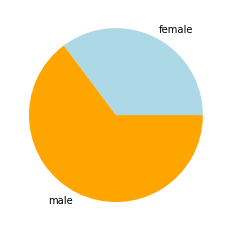

In [10]:
fig, ax = plt.subplots()
fig.set_facecolor("white")

# Defining Data
data = titanic.pivot_table(values="PassengerId", index = "Sex", aggfunc = {"PassengerId": "count"}).reset_index()


ax.pie(data["PassengerId"], labels = data["Sex"], colors= ["lightblue", "orange"])
plt.show()

# Advanced

### Box plot

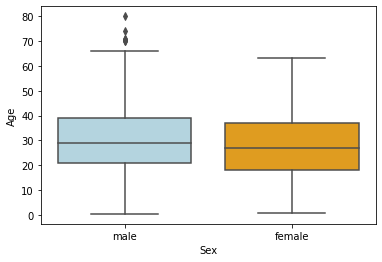

In [11]:
sns.boxplot(data = titanic, x = "Sex", y = "Age", palette=["lightblue", "orange"])
plt.show()

### Heatmap

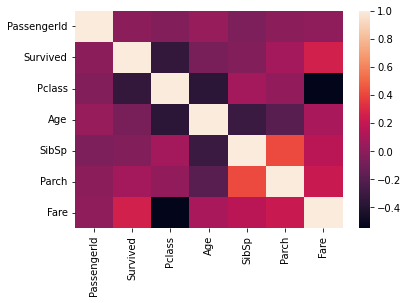

In [12]:
sns.heatmap(titanic.corr())
plt.show()

# Styling

### Axis and Legend
If we use matplotlibs axes to generate seaborn charts, we can use the matplotlib syntax to manipulate the styling.

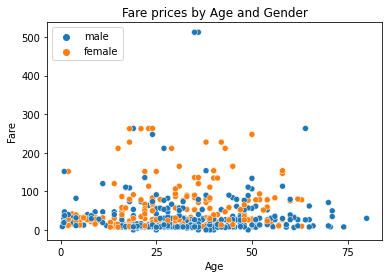

In [13]:
data = gdp.loc[gdp["Country Name"].isin(["United States", "Germany", "France", "Spain", "Russia"])]

fix, ax = plt.subplots()
sns.scatterplot(data = titanic, x = "Age", y = "Fare", hue = "Sex")

ax.set_title("Fare prices by Age and Gender")
ax.set_xticks([0, 25, 50, 75])
ax.set_xlabel("Age")


ax.legend(loc = "upper left")

plt.show()

# Subplots

* plt.subplots(rows, columns)
* just add ax = desired position in seaborn


### One-Dimensional

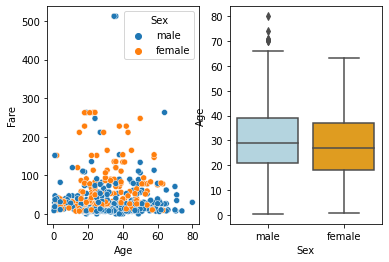

In [14]:
fig, ax = plt.subplots(1, 2)

sns.scatterplot(data = titanic, x = "Age", y = "Fare", hue = "Sex", ax = ax[0])
sns.boxplot(data = titanic, x = "Sex", y = "Age", palette=["lightblue", "orange"], ax = ax[1])

plt.show()

### Multi-Dimensional

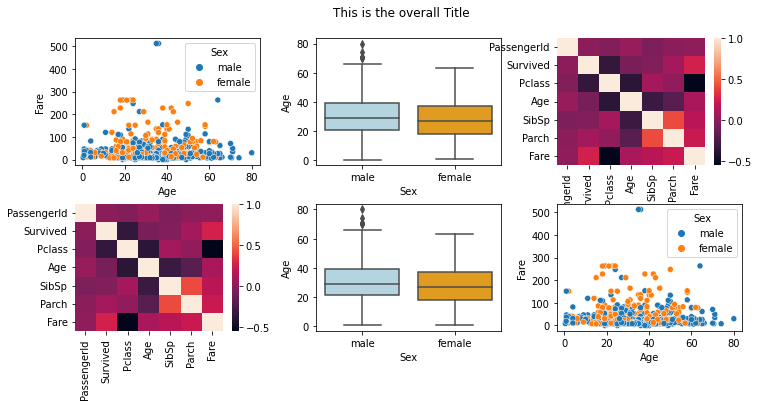

In [15]:
fig, ax = plt.subplots(2, 3)

fig.set_figwidth(10)                                                       # Styling the base layer / figure
fig.set_figheight(5)
fig.suptitle("This is the overall Title")

fig.tight_layout()                                                        # creates an overall more spaced out layout
fig.subplots_adjust(hspace=.3, wspace=.3)                                 # hspace = horizontal space, wspace = vertical space



sns.scatterplot(data = titanic, x = "Age", y = "Fare", hue = "Sex", ax = ax[0, 0])                             # 0,0
sns.boxplot(data = titanic, x = "Sex", y = "Age", palette=["lightblue", "orange"], ax = ax[0, 1])              # 0,1
sns.heatmap(titanic.corr(), ax = ax[0, 2])                                                                     # 0,2


sns.heatmap(titanic.corr(), ax = ax[1, 0])                                                                     # 1,0
sns.boxplot(data = titanic, x = "Sex", y = "Age", palette=["lightblue", "orange"], ax = ax[1, 1])              # 1,1
sns.scatterplot(data = titanic, x = "Age", y = "Fare", hue = "Sex", ax = ax[1, 2])                             # 1,2


plt.show()